# Statistical Calculator

https://www.evanmiller.org/ab-testing/

## Sample Size Calculator

https://stackoverflow.com/questions/15204070/is-there-a-python-scipy-function-to-determine-parameters-needed-to-obtain-a-ta

In [26]:
from scipy.stats import norm, zscore

def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
    z = norm.isf([sig/2]) #two-sided t test
    zp = -1 * norm.isf([power]) 
    d = (p1-p2)
    s =2*((p1+p2) /2)*(1-((p1+p2) /2))
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

def sample_power_difftest(d, s, power=0.8, sig=0.05):
    z = norm.isf([sig/2])
    zp = -1 * norm.isf([power])
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

## Chi-Squared Test

https://stackoverflow.com/questions/26615019/python-proportion-test-similar-to-prop-test-in-r

In [ ]:
np.array([100])

In [10]:
survivors = np.array([[100,14], [100, 20]])

In [11]:
from scipy import stats
import numpy as np

# survivors = np.array([[1781,135], [1443, 47]])
result = stats.chi2_contingency(survivors)

In [13]:
result[1]

(0.58683378482972248,
 0.44364609286729395,
 1,
 array([[  97.43589744,   16.56410256],
        [ 102.56410256,   17.43589744]]))

In [14]:
from statsmodels.stats.proportion import proportions_chisquare

In [16]:
successes = np.array([14,20])
trials = np.array([100,100])

In [19]:
result = proportions_chisquare(successes,trials)

In [21]:
result[1]

0.25870176105718623

### Sample Proportion CI's

https://select-statistics.co.uk/calculators/confidence-interval-calculator-population-proportion/
    

In [1]:
from scipy.stats.mstats import zscore
samp_prop = 0.14

In [22]:
import numpy as np

from scipy.stats import norm
norm.ppf(.99)

2.3263478740408408

In [34]:
sample1_prop = 0.14
sample1_trials = 100

In [35]:
z_score = norm.ppf(1-(1-0.99)/2)

In [36]:
err1 = (float(z_score))* \
np.sqrt( (sample1_prop * ( 1-sample1_prop))/int(sample1_trials))

In [39]:
err1

0.089377936358083027

In [38]:
print(.14-err1,.14+err1)

0.0506220636419 0.229377936358


## Sequential Sampling

## 2 Sample T-Test

In [83]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [84]:
a = [54,231,554,322,553,111]
b = [54,231,554,322,553,111]

In [85]:
t, p = ttest_ind(a, b, equal_var=False)

In [86]:
p

1.0

In [92]:
p = np.asarray(a).flatten()

In [101]:
p = p.reshape(-1, 1)

In [124]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(p)

In [125]:
log_dens = kde.score_samples(p)

In [142]:
p

array([[ 54],
       [231],
       [554],
       [322],
       [553],
       [111]])

In [243]:
data1 = [64.2,
28.4,
85.3,
83.1,
13.4,
56.8,
44.2,
90]

In [244]:
data2 = [45,
29.5,
32.3,
49.3,
18.3,
34.2,
43.9,
13.8,
27.4,
43.4]

In [245]:
len(data)

18

In [199]:
data = np.concatenate((5 + np.random.randn(10, 1),
                       10 + np.random.randn(30, 1)))

In [214]:
data = np.concatenate([data1,data2])
data = data.reshape(-1,1)

In [215]:
data.shape

(18, 1)

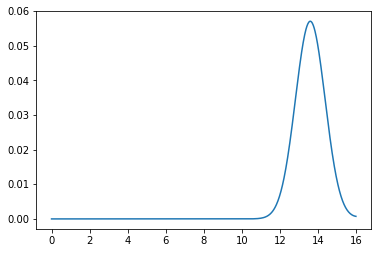

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity

# Generate random samples from a mixture of 2 Gaussians
# with modes at 5 and 10
# data = np.concatenate((5 + np.random.randn(10, 1),
#                        10 + np.random.randn(30, 1)))

# Plot the true distribution
x = np.linspace(0, 16, 1000)[:, np.newaxis]
# norm_vals = mlab.normpdf(x, 5, 1) * 0.25 + mlab.normpdf(x, 10, 1) * 0.75
# plt.plot(x, norm_vals)

# Plot the data using a normalized histogram
# plt.hist(data, 50, normed=True)

# Do kernel density estimation
kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data)

# Plot the estimated densty
kd_vals = np.exp(kd.score_samples(x))
plt.plot(x, kd_vals)

# Show the plots
plt.show()

In [218]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)    

In [219]:
prob_under_minus1

0.15865525393145707

## Survival Times

In [248]:
from lifelines.statistics import logrank_test
# other_lifetimes = np.random.exponential(3, size=500)


x = logrank_test(data1, data2, alpha=0.95)

In [249]:
data1

[64.2, 28.4, 85.3, 83.1, 13.4, 56.8, 44.2, 90]

In [257]:
np.sort(data1) 

array([ 13.4,  28.4,  44.2,  56.8,  64.2,  83.1,  85.3,  90. ])

In [271]:
y1 = []
for i in np.sort(data1):
    x = 1 - np.compress((i > data1), data1).size/len(data1)
    y1.append(x)

In [272]:
y1

[1.0, 0.875, 0.75, 0.625, 0.5, 0.375, 0.25, 0.125]

In [273]:
y2 = []
for i in np.sort(data2):
    x = 1 - np.compress((i > data2), data2).size/len(data2)
    y2.append(x)

In [281]:
len(y2)

10

In [280]:
len(y1)

8

In [283]:
np.arange(0,6,1).tolist()

[0, 1, 2, 3, 4, 5]

## Count Data

In [19]:
from scipy import stats
import numpy as np
stats.binom_test(np.array([20,45]), 65)
from scipy.stats import beta

In [20]:
sample1_events = 20
sample2_events = 25
poisson_confidence_level = 0.95

In [61]:
# quantile = (1-float(poisson_confidence_level)/2)

# sample1_lower = beta.ppf(quantile, float(sample1_events), (float(sample1_events)+float(sample2_events)) - float(sample1_events) + 1)
# sample1_upper = beta.ppf(1 - quantile, float(sample1_events) + 1, (float(sample1_events)+float(sample2_events)) - float(sample1_events))

# sample2_lower = beta.ppf(quantile, float(sample2_events), (float(sample1_events)+float(sample2_events)) - float(sample2_events) + 1)
# sample2_upper = beta.ppf(1 - quantile, float(sample2_events) + 1, (float(sample1_events)+float(sample2_events)) - float(sample2_events))

# err1 = sample1_upper - sample1_lower
# err2 = sample2_upper - sample2_lower

In [24]:
sample1_lower

0.438439986382132

In [25]:
sample1_upper

0.45125907172464691

In [64]:
import scipy
from scipy.stats import poisson
lower, upper = scipy.stats.poisson.interval(0.95, [20, 25])

In [65]:
poisson_confidence_level = 0.95
sample1_events = 20
sample2_events = 25

In [66]:
lower, upper = poisson.interval(float(poisson_confidence_level),
    [float(sample1_events),float(sample2_events)])

In [71]:
upper[0]-lower[0]

17.0

In [72]:
upper[1]-lower[1]

19.0

In [76]:
12.2+17

29.2

In [73]:
16.2+19

35.2

In [74]:
upper

array([ 29.,  35.])

In [75]:
lower

array([ 12.,  16.])

## Price Elasticity

In [284]:
new_quantity = 2000
original_quantity = 4000
new_price = 1
original_price = 1.5

In [285]:
pe = ( (float(new_quantity)-float(original_quantity) ) / (float(new_quantity)+float(original_quantity) ) ) /\
     ( (float(new_price) - float(original_price ) ) / (float(new_price) + float(original_price)))

In [286]:
pe

1.6666666666666665

In [287]:
newbroiler = pd.read_csv("/Users/Collier/Dropbox/Skills/Python/Projects/Business_Exercises/statistical_calculator_dash/newbroiler.csv")

In [288]:
newbroiler.head()

,Unnamed: 0,year,q,y,p,pb,pcorn,pf,qprod,lexpts,popgro
0,1,1950,14.3,7863,2.88382,1.29461,2.48133,NaN,1826.615723,-0.171839,NaN
1,2,1951,15.1,7953,2.80385,1.40385,2.77308,NaN,1975.677490,-0.164843,1.7161
2,3,1952,15.3,8071,2.75849,1.36604,2.69057,NaN,1981.375977,-0.192259,1.7286
3,4,1953,15.2,8319,2.67041,1.06742,2.34831,NaN,2052.744873,-0.166814,1.6635
4,5,1954,15.8,8276,2.39405,1.01859,2.35688,NaN,2154.065430,-0.174905,1.7711


In [289]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

est = sm.OLS(np.log(newbroiler['q']), sm.add_constant(np.log(newbroiler['p']))).fit()

/Users/Collier/miniconda3/envs/env1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [299]:
est.params[1]

-1.1213579877617554

In [304]:
# list(newbroiler['p'])

In [305]:
# list(newbroiler['q'])

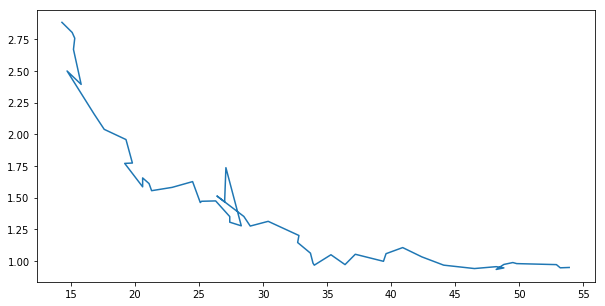

In [306]:
plt.plot(newbroiler['q'], 
         newbroiler['p'])

In [309]:
newbroiler['demand'] = ""
for idx,row in newbroiler.iterrows():
    x = np.sum(newbroiler[newbroiler['p']>=row['p']]['q'])
    newbroiler.set_value(idx,'demand',x)

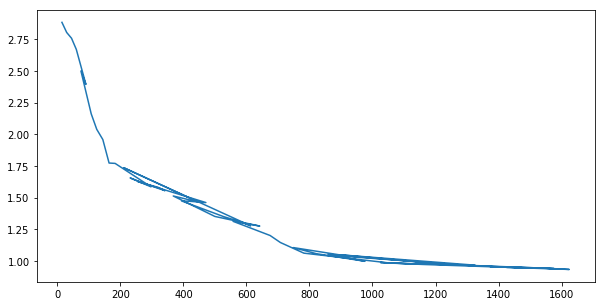

In [314]:
plt.plot(newbroiler['demand'], 
         newbroiler['p'])

In [321]:
p1 = list(newbroiler['p'])
p2 = list(newbroiler['q'])

In [325]:
df = pd.DataFrame(p1,p2).reset_index()
df.columns = ["quantity","price"]
df

,quantity,price
0,14.300000,2.88382
1,15.100000,2.80385
2,15.300000,2.75849
3,15.200000,2.67041
4,15.800000,2.39405
5,14.700000,2.50000
6,16.799999,2.16176
7,17.600000,2.03915
8,19.299999,1.95848
9,19.799999,1.77320


## Pearson Correlation

In [338]:
np.corrcoef(p1, p2)[0,1]

-0.84292996329217118

In [344]:
df.corr(method="pearson").iloc[0,1]

-0.84292996329217118